In [1]:
import numpy as np
import pandas as pd

In [2]:
oridata = pd.read_csv(
    'C:/Users/hp/Desktop/MyNotebook/dataset/adult.csv',
names=["Age","Workclass","fnlwgt","Education","Education_num",
       "MArital_Staus","Occupation","Relationship","Race","Gender",
       "Capital_Gain","Capital_Loss","Hours_per_week",
       "Country","Target"],
sep=r'\s*\,s*',
engine='python',
na_values='?')

In [3]:
oridata.head()

,Age,Workclass,fnlwgt,Education,Education_num,MArital_Staus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(oridata.shape[1]))/cols

<Figure size 1440x1440 with 0 Axes>

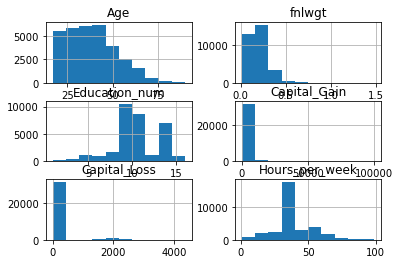

In [6]:
# for i, column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
#     ax =  fig.add_subplot(rows,cols, i+1)
#     ax.set_title(column)
#     if oridata.dtypes[column] == np.object:
#         oridata[column].value_counts().plot(kind='bar',axes=ax)
#     else:
#         oridata[column].hist(axes=ax)
#         plt.xtricks(rotation='vertical')
# plt.subplots_adjust(hspace=0.7,wspace=0.2)
# plt.show()



# select columns with numerical data types
num = oridata.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = oridata[num]
# create a histogram plot of each numeric variable
subset.hist()
plt.show()

In [7]:
import sklearn.preprocessing as preprocessing

In [8]:
le =  preprocessing.LabelEncoder()
oridata['Occupation'] = le.fit_transform(oridata['Occupation'].astype(str))

In [9]:
oridata.head()

,Age,Workclass,fnlwgt,Education,Education_num,MArital_Staus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
oridata['Target'] = le.fit_transform(oridata['Target'].astype(str))

In [11]:
oridata.tail()

,Age,Workclass,fnlwgt,Education,Education_num,MArital_Staus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,13,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,7,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,1,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,1,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,4,Wife,White,Female,15024,0,40,United-States,1


In [12]:
oridata.Target.unique()

array([0, 1])

<AxesSubplot:xlabel='Education_num'>

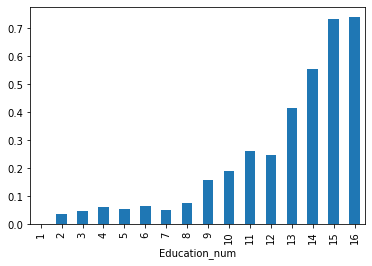

In [13]:
oridata.groupby('Education_num').Target.mean().plot(kind='bar')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = oridata[['Education_num','Occupation']]

In [16]:
Y = oridata['Target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [18]:
from sklearn.svm import SVC
#C support vector classification

In [19]:
#no tuning
classifier=SVC()

In [20]:
#MAking SVM learn
classifier.fit(x_train,y_train)

SVC()

In [21]:
#predicting result and giving accuracy
score = classifier.score(x_test,y_test)

In [22]:
score

0.7839705204974666

In [23]:
#Correlation matrix

In [24]:
import seaborn as sns

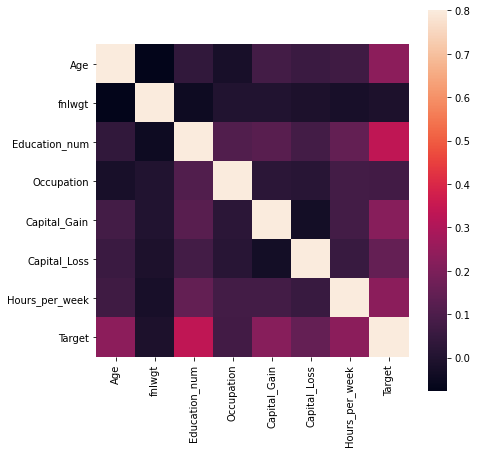

In [25]:
corrmat =  oridata.corr()
f, ax =  plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True);
plt.show()

In [26]:
oridata['Race']=le.fit_transform(oridata['Race'].astype(str))

In [27]:
oridata['Gender']=le.fit_transform(oridata['Gender'].astype(str))

In [28]:
oridata['Education']=le.fit_transform(oridata['Education'].astype(str))

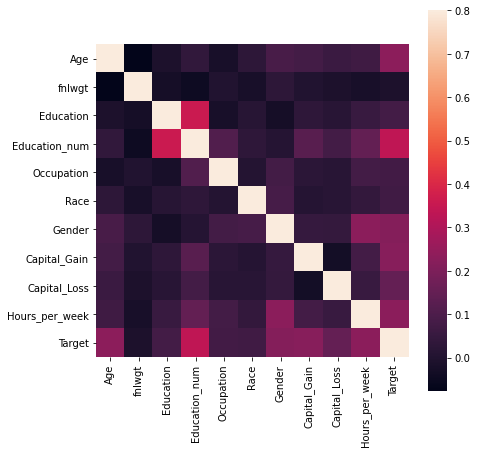

In [29]:
corrmat =  oridata.corr()
f, ax =  plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True);
plt.show()

In [30]:
#To get the actual correlation values, annotate the heatmap

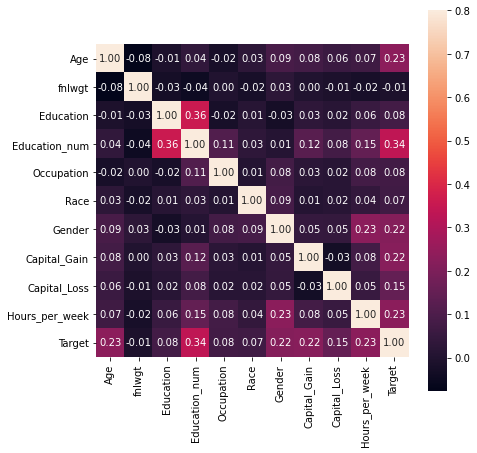

In [31]:
f, ax =  plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True, annot=True, fmt='.2f');
plt.show()

In [32]:
#Restting features
X=oridata[['Education_num','Occupation','Age']]
Y=oridata['Target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.787655458314141


In [33]:
#Restting features
X=oridata[['Education_num','Occupation','Age','Gender']]
Y=oridata['Target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.7937970213419315


In [34]:
#Setting Kernel to Radial Basis Function with Penality parameter C=1.0
classifier = SVC(kernel='rbf',C=1.0)
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.7937970213419315


In [35]:
#Setting Kernel to Radial Basis Function with Penality parameter C=1.0
classifier = SVC(kernel='rbf',C=10.0)
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.7976354982343006


In [ ]:
#Setting Kernel to Radial Basis Function with Penality parameter C=1.0
classifier = SVC(kernel='linear',C=1.0)
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)